In [1]:
from google.colab import drive

In [2]:
##Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [19]:
# List contents of MyDrive to find the correct path
!ls /content/drive/MyDrive

 Cars.zip		  dataset.zip		  'module 3 video - text classification.ipynb'
 Car.zip		  fastbook-masters	   NewsCategory_v2.zip
 Chessman-image-dataset  'Fruits Classification'   SPAMtextData.csv
'Colab Notebooks'	  Fruits.zip		   summer_2024_04_mnist_basics_use.ipynb


In [53]:
ls "/content/drive/MyDrive/Cars.zip"

/content/drive/MyDrive/Cars.zip


In [54]:
import os
# Unzip the data set
!unzip "/content/drive/MyDrive/Cars.zip"
print( "\n\n" )
os.listdir( )

Archive:  /content/drive/MyDrive/Cars.zip
replace data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 




['.config', 'data', 'drive', 'sample_data']

In [60]:
ls"/content/data"

 sample_submission.csv   training_images/
 testing_images/        'train_solution_bounding_boxes (1).csv'


In [55]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from PIL import Image
import pandas as pd

In [92]:
os.listdir()

['.config', 'data', 'drive', 'sample_data']

In [93]:
# List contents of /content/data
data_dir = '/content/data'
print(os.listdir(data_dir))

['sample_submission.csv', 'testing_images', 'training_images', 'train_solution_bounding_boxes (1).csv']


In [125]:
ls'/content/data/testing_images'

vid_5_25100.jpg  vid_5_27260.jpg  vid_5_27980.jpg  vid_5_29440.jpg  vid_5_30840.jpg
vid_5_25120.jpg  vid_5_27280.jpg  vid_5_28000.jpg  vid_5_29460.jpg  vid_5_30860.jpg
vid_5_25140.jpg  vid_5_27300.jpg  vid_5_28020.jpg  vid_5_29480.jpg  vid_5_30920.jpg
vid_5_25160.jpg  vid_5_27320.jpg  vid_5_28040.jpg  vid_5_29500.jpg  vid_5_30940.jpg
vid_5_25180.jpg  vid_5_27360.jpg  vid_5_28060.jpg  vid_5_29520.jpg  vid_5_31020.jpg
vid_5_25200.jpg  vid_5_27380.jpg  vid_5_28080.jpg  vid_5_29540.jpg  vid_5_31040.jpg
vid_5_25220.jpg  vid_5_27400.jpg  vid_5_28180.jpg  vid_5_29560.jpg  vid_5_31060.jpg
vid_5_25240.jpg  vid_5_27420.jpg  vid_5_28260.jpg  vid_5_29580.jpg  vid_5_31080.jpg
vid_5_25260.jpg  vid_5_27440.jpg  vid_5_28320.jpg  vid_5_29600.jpg  vid_5_31100.jpg
vid_5_26320.jpg  vid_5_27460.jpg  vid_5_28340.jpg  vid_5_29620.jpg  vid_5_31120.jpg
vid_5_26400.jpg  vid_5_27480.jpg  vid_5_28360.jpg  vid_5_29640.jpg  vid_5_31140.jpg
vid_5_26420.jpg  vid_5_27500.jpg  vid_5_28380.jpg  vid_5_29720.jpg  vid_5_31

In [96]:
# Define COCO labels
import os
import torch
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as T
import torchvision.models.detection as detection

# Define COCO labels
COCO_LABELS = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
    'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut',
    'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'TV', 'laptop', 'mouse',
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'Tree'
]

def get_transform():
    return T.Compose([
        T.ToTensor(),  # Convert the image to PyTorch tensor
    ])

def load_image(image_path):
    img = Image.open(image_path).convert("RGB")  # Ensure image is in RGB mode
    transform = get_transform()
    return transform(img).unsqueeze(0)  # Add batch dimension

def display_image_with_labels(img, boxes, labels, scores):
    img = img.squeeze(0).permute(1, 2, 0).numpy()  # Convert tensor image to numpy array
    fig, ax = plt.subplots(1, figsize=(12, 9))
    ax.imshow(img)
    for box, label, score in zip(boxes, labels, scores):
        rect = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                             fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
        label_name = COCO_LABELS[label]
        plt.text(box[0], box[1], f'{label_name} ({score:.2f})', color='red', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
     plt.show()

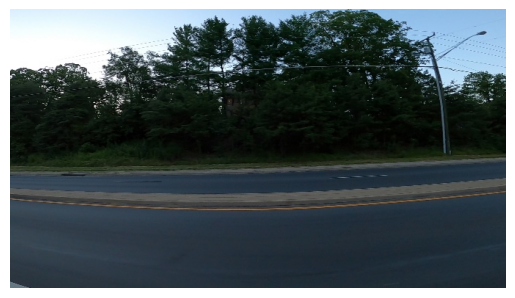

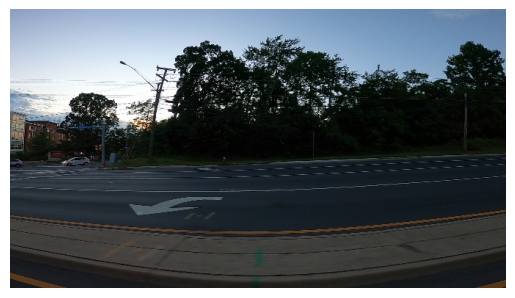

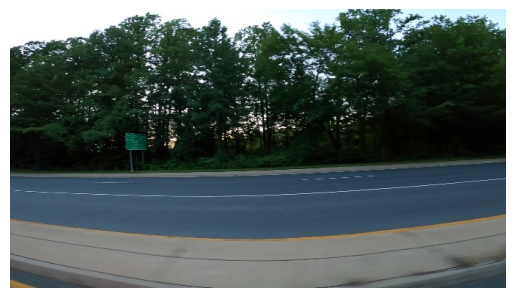

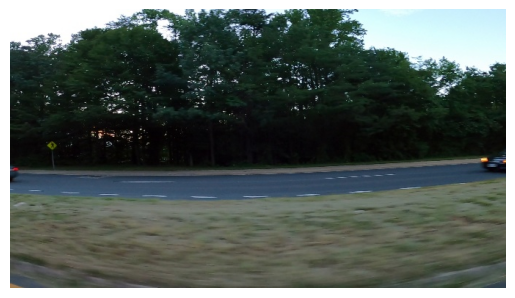

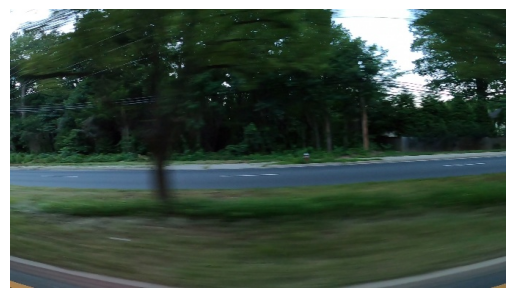

In [119]:
def display_image(image_path):
    img = Image.open(image_path).convert("RGB")  # Ensure image is in RGB mode
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

# List all images in the directory
image_files = os.listdir(training_images_path)

# Display the first 5 images from the testing_images directory
for i in range(min(5, len(image_files))):  # Show up to 5 images
    image_path = os.path.join(training_images_path, image_files[i])
    display_image(image_path)

#without detection

Transform object: Compose(
    ToTensor()
)
Loaded image tensor shape: torch.Size([1, 3, 380, 676])


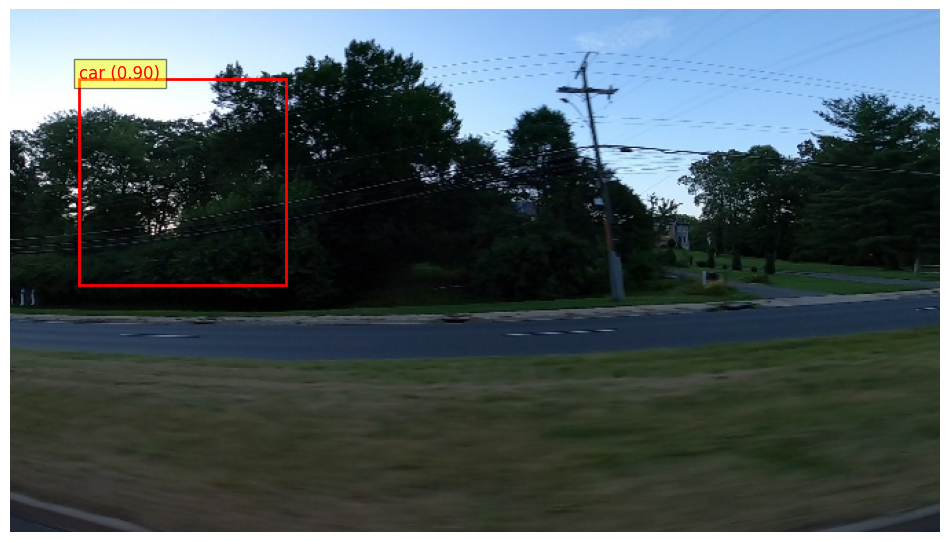

In [127]:
# Load a sample image
sample_image_path = '/content/data/testing_images/vid_5_30160.jpg'  # Replace with your image path

# Test get_transform()
transform = get_transform()
print("Transform object:", transform)

# Test load_image()
img = load_image(sample_image_path)
print("Loaded image tensor shape:", img.shape)

# Test display_image_with_labels() with dummy boxes, labels, and scores
# Dummy data for testing
dummy_boxes = [[50, 50, 200, 200]]
dummy_labels = [3]  # Example: 'car' label index
dummy_scores = [0.9]

display_image_with_labels(img, dummy_boxes, dummy_labels, dummy_scores)

In [114]:

def display_image_by_index_with_detection(directory_path, index, model, device):
    # List all images in the directory
    image_files = os.listdir(directory_path)

    if index < 0 or index >= len(image_files):
        print("Index out of range. Please provide a valid index.")
        return

    # Get the path of the image at the specified index
    image_path = os.path.join(directory_path, image_files[index])
    img = load_image(image_path)

    # Run object detection model
    model.eval()
    with torch.no_grad():
        prediction = model(img.to(device))[0]

    # Extract boxes, labels, and scores
    boxes = prediction['boxes'].cpu().numpy()
    labels = prediction['labels'].cpu().numpy()
    scores = prediction['scores'].cpu().numpy()

    # Filter out low-confidence detections (optional)
    threshold = 0.5
    filtered_indices = scores > threshold
    filtered_boxes = boxes[filtered_indices]
    filtered_labels = labels[filtered_indices]
    filtered_scores = scores[filtered_indices]

In [112]:
import torchvision.models.detection as detection

# Define the path to the training images directory
training_images_path = '/content/data/testing_images'

# Load pre-trained object detection model and set device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model = detection.fasterrcnn_resnet50_fpn(pretrained=True).to(device)

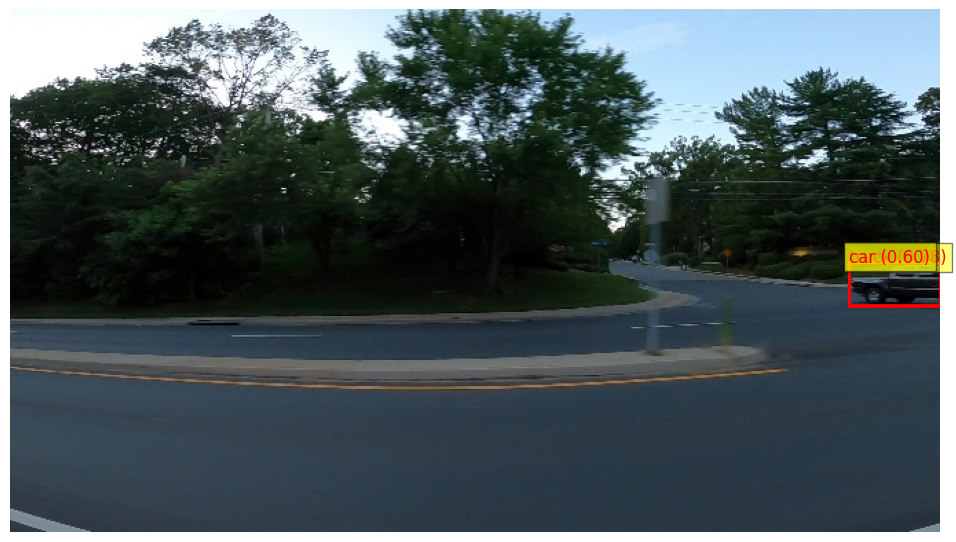

In [116]:
import matplotlib.pyplot as plt
# Display a specific image by its index with object detection
image_index = 86  # Replace with the desired index
display_image_by_index_with_detection(training_images_path, image_index, model, device)

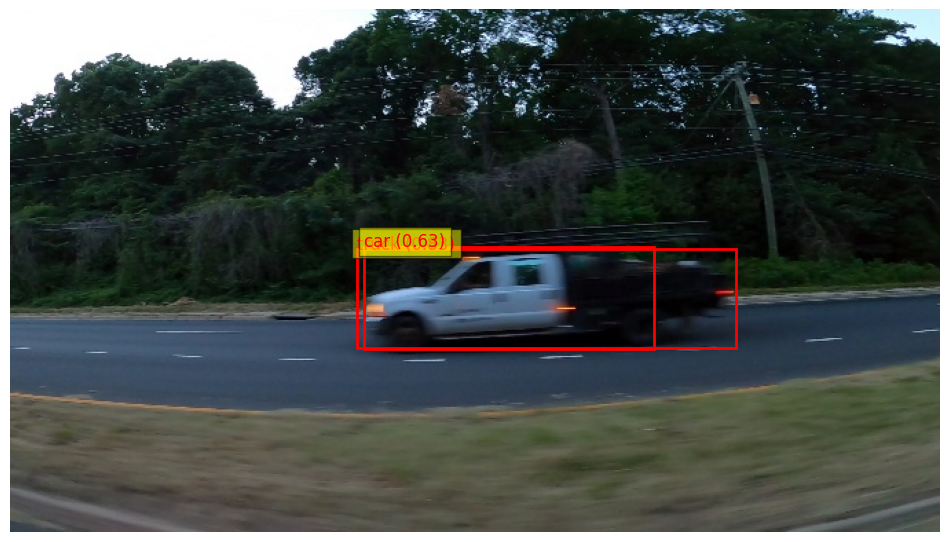

In [120]:
# Display a specific image by its index with object detection
image_index = 34
display_image_by_index_with_detection(training_images_path, image_index, model, device)

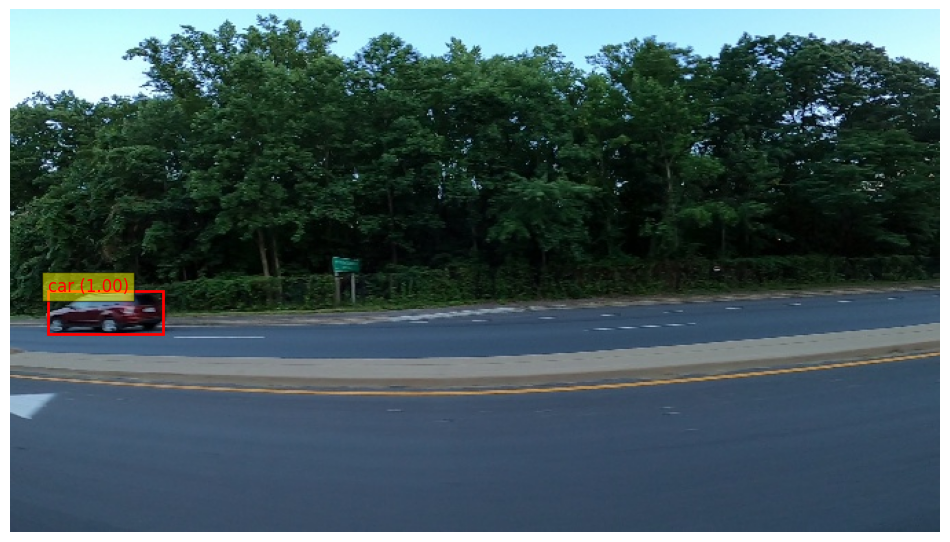

In [32]:
# Display a specific image by its index with object detection
image_index = 8
display_image_by_index_with_detection(training_images_path, image_index, model, device)

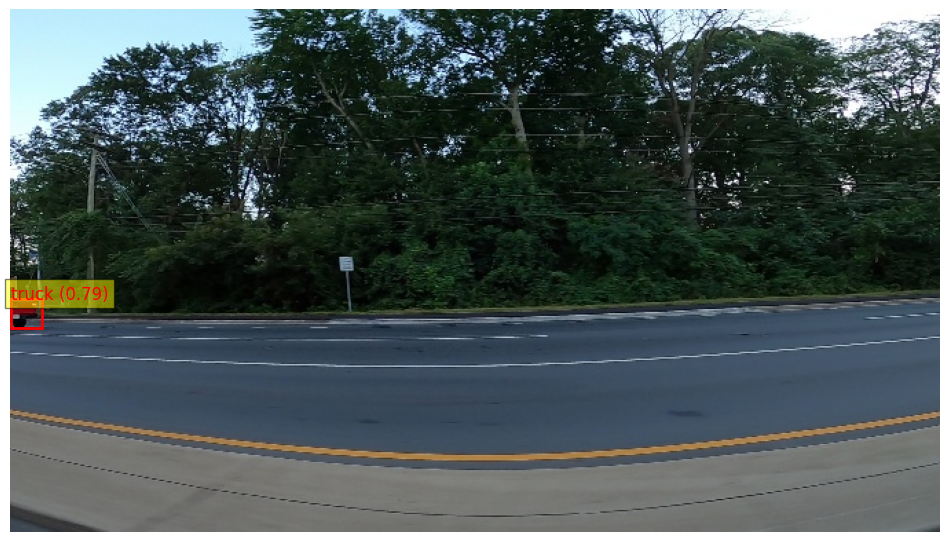

In [50]:
image_index = 37
display_image_by_index_with_detection(training_images_path, image_index, model, device)

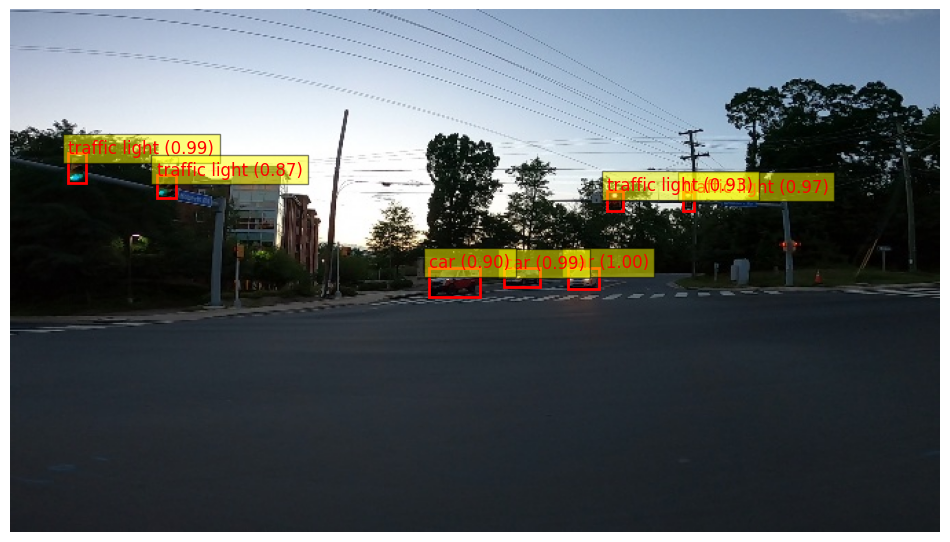

In [77]:
image_index = 115
display_image_by_index_with_detection(training_images_path, image_index, model, device)

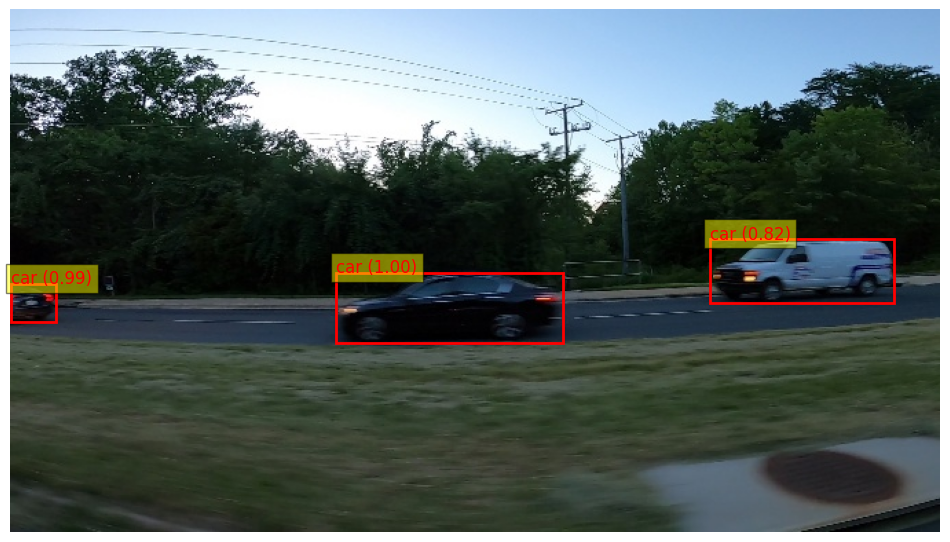